In [1]:
import sys
if sys.argv[1] == 'xxx': pass
else: 
    %matplotlib inline

import os
import datetime
import numpy
import pandas
import matplotlib
import matplotlib.pyplot
matplotlib.rcParams['font.family'] = 'Arial,freesans'
 
import necstdb

In [2]:
cwd = os.getcwd()
mode, date = cwd.split('/')[-2], cwd.split('/')[-1]

data_path = '/media/usbdisk/data/{mode}/{date}.necstdb/'.format(**locals())

db = necstdb.opendb(data_path)

In [3]:
xffts_topics = [
        'xffts_power_board01',
        'xffts_power_board02',
        'xffts_power_board03',
        'xffts_power_board04',
        'xffts_power_board05', 
        'xffts_power_board06',
        'xffts_power_board07',
        'xffts_power_board08',
        'xffts_power_board09',
        'xffts_power_board10', 
        'xffts_power_board11',
        'xffts_power_board12',
        'xffts_power_board13', 
        'xffts_power_board14', 
        'xffts_power_board15',
        'xffts_power_board16',
]

hemt_topics = [
    'hemt_2l_vd',
    'hemt_2l_vg1',
    'hemt_2l_vg2',
    'hemt_2r_vd',
    'hemt_2r_vg1',
    'hemt_2r_vg2',
    'hemt_3l_vd',
    'hemt_3l_vg1',
    'hemt_3l_vg2',
    'hemt_3r_vd',
    'hemt_3r_vg1',
    'hemt_3r_vg2',
    'hemt_4l_vd',
    'hemt_4l_vg1',
    'hemt_4l_vg2',
    'hemt_4r_vd',
    'hemt_4r_vg1',
    'hemt_4r_vg2',
    'hemt_5l_vd',
    'hemt_5l_vg1',
    'hemt_5l_vg2',
    'hemt_5r_vd',
    'hemt_5r_vg1',
    'hemt_5r_vg2',    
]

sisv_topics = [
    'sis_vol_1ll',
    'sis_vol_1lu',
    'sis_vol_1rl',
    'sis_vol_1ru',
    'sis_vol_2l',
    'sis_vol_2r',
    'sis_vol_3l',
    'sis_vol_3r',
    'sis_vol_4l',
    'sis_vol_4r',
    'sis_vol_5l',
    'sis_vol_5r',
]

sisi_topics = [
    'sis_cur_1ll',
    'sis_cur_1lu',
    'sis_cur_1rl',
    'sis_cur_1ru',
    'sis_cur_2l',
    'sis_cur_2r',
    'sis_cur_3l',
    'sis_cur_3r',
    'sis_cur_4l',
    'sis_cur_4r',
    'sis_cur_5l',
    'sis_cur_5r',
]

loatt_topics = [
    'loatt_2l',
    'loatt_2r',
    'loatt_3l',
    'loatt_3r',
    'loatt_4l',
    'loatt_4r',
    'loatt_5l',
    'loatt_5r',
]


In [1]:
xffts = {
    _: db.open_table(_).read(astype='array')
    for _ in xffts_topics
}

tp = {
    _: xffts[_]['total_power']
    for _ in xffts_topics
}

dt1 = {
    _: xffts[_]['received_time'][1:] - xffts[_]['received_time'][:-1]
    for _ in xffts_topics
}

dt2 = {
    _: xffts[_]['received_time'][1:] - xffts[_]['received_time'][:-1]
    for _ in xffts_topics
}

hemt = {
    _: db.open_table(_).read(astype='array')
    for _ in hemt_topics
}

sisv = {
    _ : db.open_table(_).read(astype='array')
    for _ in sisv_topics
}

sisi = {
    _ : db.open_table(_).read(astype='array')
    for _ in sisi_topics
}


status = db.open_table('yfactor_sisv_sweep_Tsys-status').read(astype='array')

chopper = db.open_table('cpz7415v_1_rsw0_u_step').read(astype='array')

NameError: name 'xffts_topics' is not defined

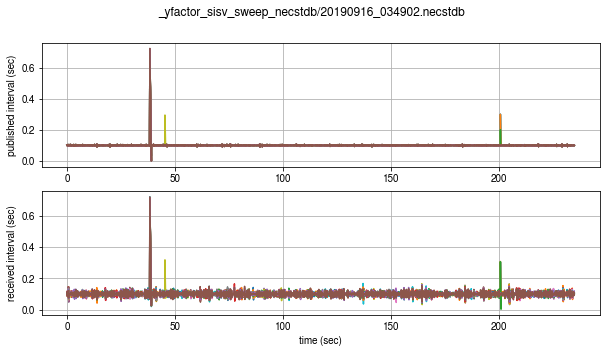

In [5]:
fig = matplotlib.pyplot.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
[ax.plot(xffts[_]['received_time'][:-1] - xffts[_]['received_time'][0], dt1[_]) for _ in xffts]
ax.grid(True)
ax.set_ylabel('published interval (sec)')

ax = fig.add_subplot(2,1,2)
[ax.plot(xffts[_]['received_time'][:-1] - xffts[_]['received_time'][0], dt2[_]) for _ in xffts]
ax.grid(True)
ax.set_xlabel('time (sec)')
ax.set_ylabel('received interval (sec)')

fig.suptitle(mode + '/' +date)
fig.savefig('check_intervals.png')

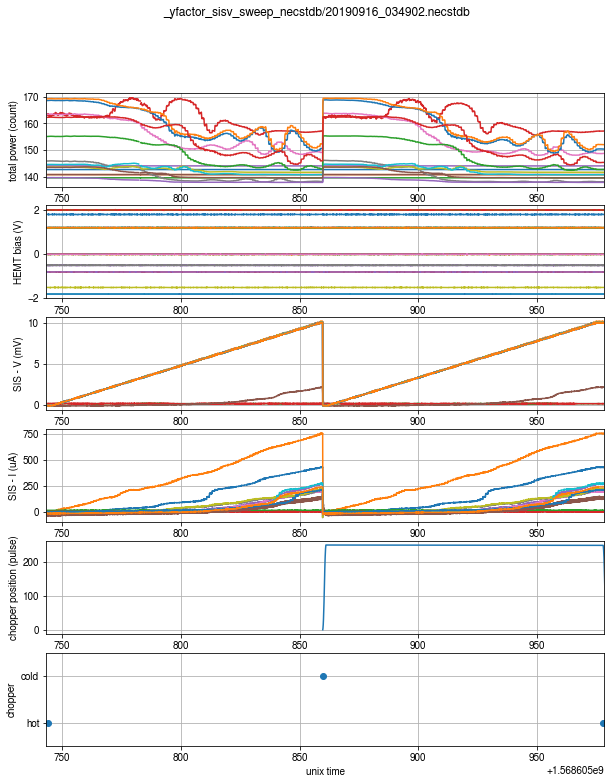

In [6]:
nrows = 6

maxx = numpy.max([
    numpy.max(status['received_time'] ),
]) + 0.5

minx = numpy.min([
    numpy.min(status['received_time']),
]) - 0.5

fig = matplotlib.pyplot.figure(figsize=(10,12))

ax = fig.add_subplot(nrows,1,1)
[ax.plot(xffts[_]['received_time'], 10*numpy.log10(tp[_])) for _ in xffts]
ax.grid(True)
ax.set_ylabel('total power (count)')
ax.set_xlim(minx, maxx)

ax = fig.add_subplot(nrows,1,2)
[ax.plot(hemt[_]['received_time'], hemt[_]['data']) for _ in hemt]
ax.grid(True)
ax.set_ylabel('HEMT bias (V)')
ax.set_xlim(minx, maxx)

ax = fig.add_subplot(nrows, 1, 3)
[ax.plot(sisv[_]['received_time'], sisv[_]['data']) for _ in sisv]
ax.set_ylabel('SIS - V (mV)')
ax.set_xlim(minx, maxx)
ax.grid(True)

ax = fig.add_subplot(nrows, 1, 4)
[ax.plot(sisi[_]['received_time'], sisi[_]['data']) for _ in sisi]
ax.set_ylabel('SIS - I (uA)')
ax.set_xlim(minx, maxx)
ax.grid(True)

ax = fig.add_subplot(nrows, 1, 5)
ax.plot(chopper['received_time'], chopper['data'])
ax.set_ylabel('chopper position (pulse)')
ax.set_xlim(minx, maxx)
ax.grid(True)

ax = fig.add_subplot(nrows,1,6)
status_ = []
for _ in status['data']:
    if _.find(b'cold')!=-1: status_.append(1)
    else: status_.append(0)
    continue
ax.plot(status['received_time'], status_, 'o')
ax.grid(True)
ax.set_ylim(-0.5, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(['hot', 'cold'])
ax.set_ylabel('chopper')
ax.set_xlim(minx, maxx)
ax.set_xlabel('unix time')

fig.suptitle(mode + '/' +date)
fig.savefig('check.png')

In [7]:
t1 =status[status['data'] == b'hot ']['received_time'][0]
t2 =status[status['data'] == b'cold']['received_time'][0]
t3 =status[status['data'] == b'hot ']['received_time'][1]
t1,t2,t3

(1568605743.8039629, 1568605859.7671373, 1568605977.9087794)

In [8]:
xffts2sisv = {
        'xffts_power_board01': 'sis_vol_2l',
        'xffts_power_board02': 'sis_vol_2l',
        'xffts_power_board03': 'sis_vol_2r',
        'xffts_power_board04': 'sis_vol_1ll',
        'xffts_power_board05': 'sis_vol_3l',
        'xffts_power_board06': 'sis_vol_3l',
        'xffts_power_board07': 'sis_vol_3r',
        'xffts_power_board08': 'sis_vol_3r',
        'xffts_power_board09': 'sis_vol_4l',
        'xffts_power_board10': 'sis_vol_4l',
        'xffts_power_board11': 'sis_vol_4r',
        'xffts_power_board12': 'sis_vol_4r',
        'xffts_power_board13': 'sis_vol_5l',
        'xffts_power_board14': 'sis_vol_5l',
        'xffts_power_board15': 'sis_vol_5r',
        'xffts_power_board16': 'sis_vol_5r',
}
# board04だけ200GHzのものを繋いでいます(CLT:9/16現在)

In [9]:
df_ = {
    _ : pandas.concat(
        [
            pandas.DataFrame(
                sisv[xffts2sisv[_]]['data'],
                index = pandas.to_datetime(sisv[xffts2sisv[_]]['received_time'], unit='s'),
                columns = ['sisv'],
            ),
            
            pandas.DataFrame(
                xffts[_]['total_power'],
                index = pandas.to_datetime(xffts[_]['received_time'], unit='s'),
                columns = ['tp'],
            ),
        ],

        axis = 1,
    )
    for _ in xffts_topics
}

df = {_ : df_[_].resample('0.1S').median() for _ in df_}



In [10]:
df_hot = {}
df_cold = {}
for _ in xffts_topics:
     df_hot[_] = df[_][(df[_].index > datetime.datetime.fromtimestamp(t1))&(df[_].index < datetime.datetime.fromtimestamp(t2))]
for _ in xffts_topics:
     df_cold[_] = df[_][(df[_].index > datetime.datetime.fromtimestamp(t2))&(df[_].index < datetime.datetime.fromtimestamp(t3))]

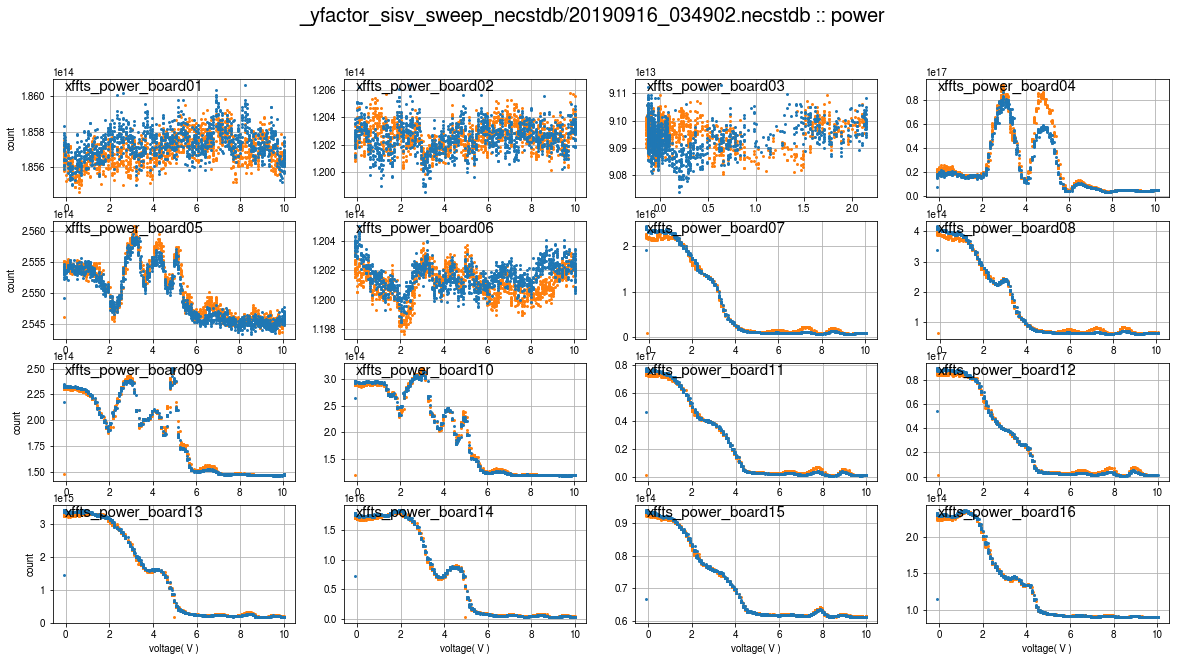

In [11]:
fig = matplotlib.pyplot.figure(figsize=(20,10))
ax =[fig.add_subplot(4,4, i) for i in range(1,17)]
for i,(_ax,key) in enumerate(zip(ax, df)):
    _ax.plot(df_hot[key]['sisv'], df_hot[key]['tp'], '.', mfc= 'C1', mec='None')
    _ax.plot(df_cold[key]['sisv'], df_cold[key]['tp'], '.', mfc= 'C0', mec='None')
    if i //4 == 3:
        _ax.set_xlabel('voltage( V )')
    if i%4 == 0:
        _ax.set_ylabel('count')
    _ax.text(0.05, 0.9, key,size=15, transform=_ax.transAxes)
    _ax.grid()
fig.suptitle(mode+'/'+date+' :: power', size=20)
fig.savefig(mode+'_'+date+'_sisv_tp.png')

In [12]:
c_hot = {}
c_cold = {}
for _ in xffts_topics:
    c_hot[_] = pandas.cut(df_hot[_]['sisv'], numpy.arange(0,10.1,0.1))  #(initialize_voltage, finalize_voltage+0.1, step)
    c_cold[_] = pandas.cut(df_cold[_]['sisv'], numpy.arange(0,10.1,0.1))

In [13]:
df_hot_ ={}
df_cold_ ={}
for _ in xffts_topics:
    df_hot_[_] = df_hot[_].groupby(c_hot[_]).mean()
    df_cold_[_] = df_cold[_].groupby(c_cold[_]).mean()

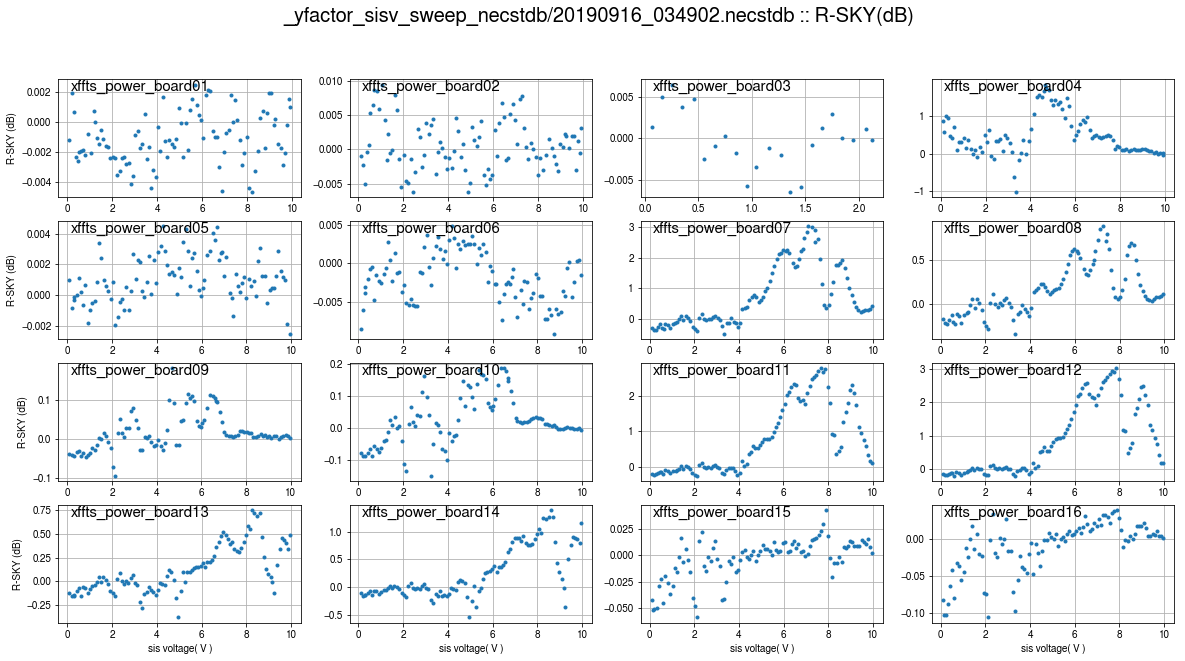

In [14]:
fig = matplotlib.pyplot.figure(figsize=(20,10))
ax =[fig.add_subplot(4,4, i) for i in range(1,17)]
for i,(_ax,key) in enumerate(zip(ax, df_hot_)):
    _ax.plot(df_hot_[key]['sisv'] ,10*numpy.log10(df_hot_[key]['tp']/df_cold_[key]['tp']),'.')
    if i //4 == 3:
        _ax.set_xlabel('sis voltage( V )')
    if i%4 == 0:
        _ax.set_ylabel('R-SKY (dB)')
    _ax.text(0.05, 0.9, key,size=15, transform=_ax.transAxes)
    _ax.grid()
fig.suptitle(mode+'/'+date+' :: R-SKY(dB)', size=20)
fig.savefig(mode+'_'+date+'_sisv_rsky.png')

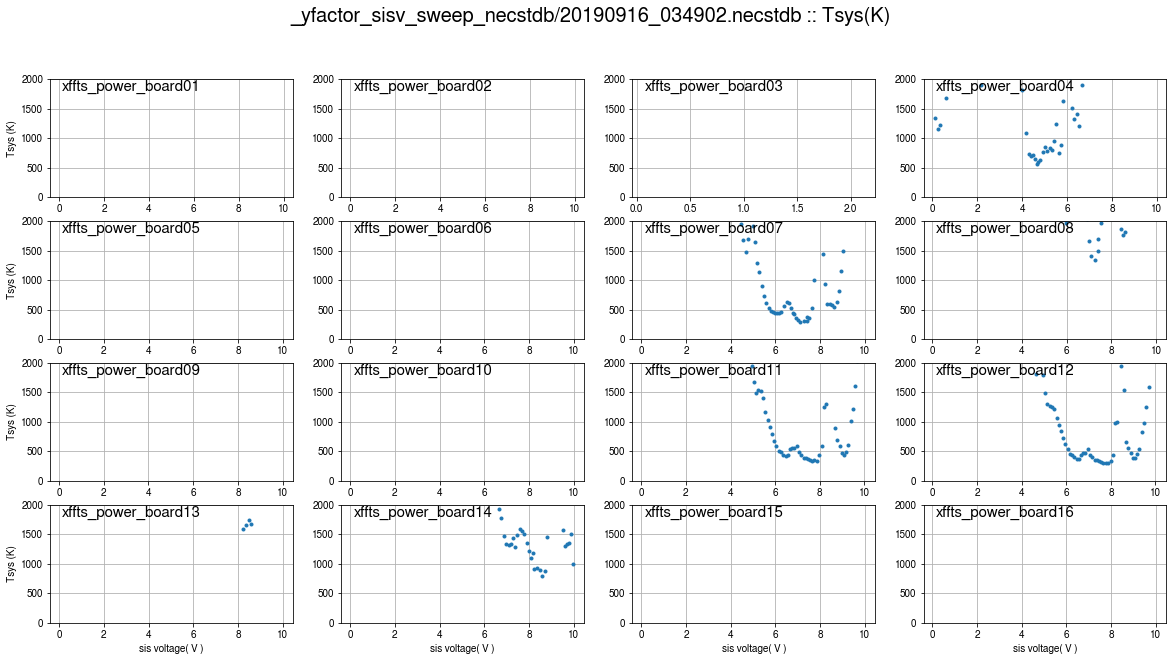

In [15]:
fig = matplotlib.pyplot.figure(figsize=(20,10))
ax =[fig.add_subplot(4,4, i) for i in range(1,17)]
for i,(_ax,key) in enumerate(zip(ax, df_hot_)):
    Tsys = 300/(df_hot_[key]['tp']/df_cold_[key]['tp'] -1)
    _ax.plot(df_hot_[key]['sisv'] ,Tsys, '.')
    if i //4 == 3:
        _ax.set_xlabel('sis voltage( V )')
    if i%4 == 0:
        _ax.set_ylabel('Tsys (K)')
    _ax.set_ylim(0, 2000)
    _ax.text(0.05, 0.9, key,size=15, transform=_ax.transAxes)
    _ax.grid()
fig.suptitle(mode+'/'+date+' :: Tsys(K)', size=20)
fig.savefig(mode+'_'+date+'.png')